In [47]:
# Jacques TELLIER 20200858 #

In [48]:
#--------------------------------------- DATA SET 2 -------------------------------------------------#

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [50]:
df = pd.read_csv("ny-trips-data.csv")
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount
count,97986.000000,97986.000000,97986.000000,97986.000000,97986.000000,97986.000000,97986.000000,97986.000000,97986.000000,97986.000000
mean,1.550660,1.669647,2.843857,-73.974872,40.751572,-73.973723,40.751932,12.325505,1.703544,15.488345
std,0.497429,1.360358,3.459561,0.041365,0.026359,0.034975,0.031086,10.258447,2.340548,12.629102
min,1.000000,0.000000,0.000000,-80.592438,40.518974,-74.641792,40.268238,-52.000000,-0.750000,-52.800000
25%,1.000000,1.000000,1.000000,-73.991692,40.738659,-73.991051,40.737080,6.500000,0.000000,8.300000
50%,2.000000,1.000000,1.670000,-73.981590,40.754742,-73.979515,40.754803,9.000000,1.200000,11.600000
75%,2.000000,2.000000,3.070000,-73.968132,40.767719,-73.963791,40.769366,14.000000,2.250000,17.150000
max,2.000000,6.000000,99.900000,-72.241508,41.035873,-72.241508,41.075256,495.000000,88.200000,495.300000


In [51]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [52]:

#mot -> minutes of trip
def get_mot(dt1, dt2):
    return round(((dt2 - dt1).total_seconds())/60)

df["mot"] = df.apply(lambda x: get_mot(x.tpep_pickup_datetime, x.tpep_dropoff_datetime), axis=1)
print(df)

       VendorID      tpep_pickup_datetime     tpep_dropoff_datetime  \
0             2 2015-01-15 19:05:39+00:00 2015-01-15 19:23:42+00:00   
1             2 2015-01-15 19:05:39+00:00 2015-01-15 19:32:00+00:00   
2             2 2015-01-15 19:05:40+00:00 2015-01-15 19:21:00+00:00   
3             2 2015-01-15 19:05:40+00:00 2015-01-15 19:28:18+00:00   
4             2 2015-01-15 19:05:41+00:00 2015-01-15 19:20:36+00:00   
...         ...                       ...                       ...   
97981         1 2015-01-15 06:04:36+00:00 2015-01-15 06:09:13+00:00   
97982         1 2015-01-15 06:04:36+00:00 2015-01-15 06:43:36+00:00   
97983         1 2015-01-15 06:04:36+00:00 2015-01-15 06:17:32+00:00   
97984         1 2015-01-15 06:04:37+00:00 2015-01-15 06:09:38+00:00   
97985         1 2015-01-15 06:04:38+00:00 2015-01-15 06:09:45+00:00   

       passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
0                    1           1.59        -73.993896        40.75011

(array([2.024e+03, 3.500e+01, 8.000e+00, 3.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 5.000e+00]),
 array([1.0000e+00, 2.3130e+02, 4.6160e+02, 6.9190e+02, 9.2220e+02,
        1.1525e+03, 1.3828e+03, 1.6131e+03, 1.8434e+03, 2.0737e+03,
        2.3040e+03]),
 <BarContainer object of 10 artists>)

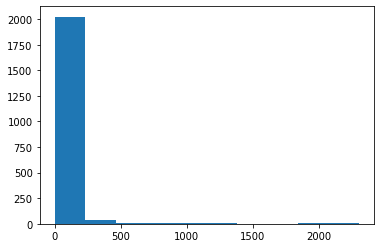

In [53]:
def count_rows(rows):
    return len(rows)
grp = df.groupby(["trip_distance"]).apply(count_rows)
plt.hist(grp)

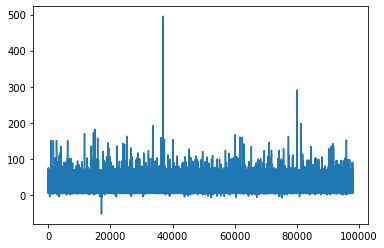

In [54]:
plt.plot(df["total_amount"])

(array([[3.6000e+01, 2.0000e+00, 4.0000e+00, 3.6100e+02, 1.5130e+03,
         3.9140e+03, 6.8520e+03, 7.5520e+03, 9.0720e+03, 8.6370e+03,
         6.4560e+03, 7.0450e+03, 6.3000e+03, 4.3240e+03, 4.5460e+03,
         3.8140e+03, 2.4730e+03, 2.8500e+03, 2.3660e+03, 1.5280e+03,
         1.7270e+03, 1.5010e+03, 1.0840e+03, 1.2000e+03, 1.0930e+03,
         6.8900e+02, 7.3000e+02, 6.3900e+02, 4.6700e+02, 4.9000e+02,
         4.8700e+02, 3.2100e+02, 3.6700e+02, 3.6900e+02, 2.6100e+02,
         2.9500e+02, 2.8700e+02, 2.6800e+02, 2.6500e+02, 2.7100e+02,
         2.7300e+02, 2.6100e+02, 2.7100e+02, 2.2700e+02, 2.1200e+02,
         2.4900e+02, 1.9700e+02, 1.5400e+02, 1.9200e+02, 1.6700e+02,
         1.3800e+02, 1.3100e+02, 2.4100e+02, 8.0000e+01, 1.0100e+02,
         8.4000e+01, 6.8000e+01, 8.6000e+01, 5.0400e+02, 6.1000e+01,
         7.9000e+01, 5.1000e+01, 5.8000e+01, 2.0000e+02, 5.9000e+01,
         1.0000e+02, 7.6000e+01, 2.7000e+01, 1.0600e+02, 5.0300e+02,
         3.8000e+01, 1.9000e+01, 1

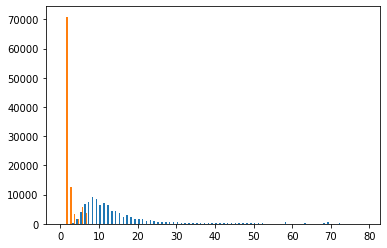

In [55]:
plt.hist(df[["total_amount", "passenger_count"]], range(0, 80))

Text(0, 0.5, 'Frequency')

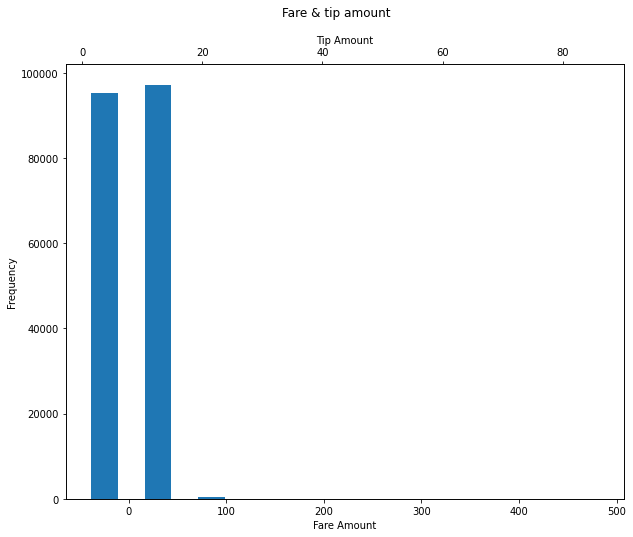

In [56]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twiny()

ax1.hist(df["fare_amount"], rwidth=0.5)
fig.suptitle("Fare & tip amount")
ax1.set_xlabel("Fare Amount")
ax1.set_ylabel("Frequency")

ax2.hist(df["tip_amount"], rwidth=0.5)
ax2.set_xlabel("Tip Amount")
ax2.set_ylabel("Frequency")

Text(0, 0.5, 'Sells')

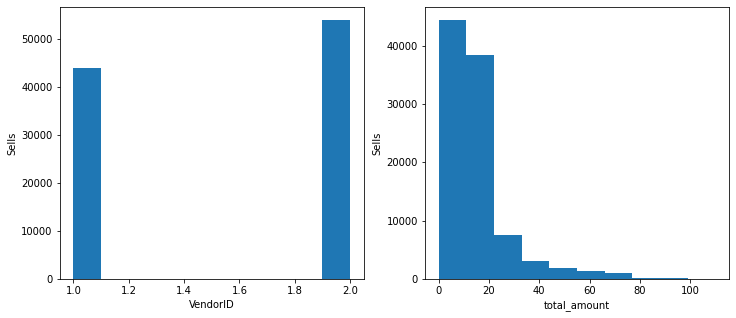

In [57]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))
ax1.hist(df["VendorID"])
ax1.set_xlabel("VendorID")
ax1.set_ylabel("Sells")

ax2.hist(df["total_amount"], range=(0, 110))
ax2.set_xlabel("total_amount")
ax2.set_ylabel("Sells")

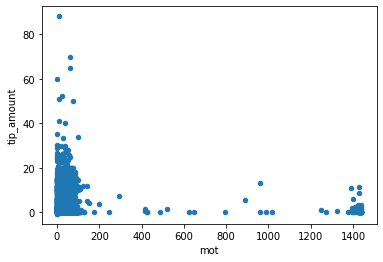

In [58]:
df.plot.scatter(x="mot", y="tip_amount")
plt.xlabel("mot")
plt.ylabel("tip_amount")
plt.show()